In [2]:
import pandas as pd 
df= pd.read_csv("../Dataset/flavour.csv")

In [3]:
df.head()

,Age,Gender,Flavour
0,6,Male,Chocolate
1,6,Female,Strawberry
2,7,Male,Chocolate
3,8,Female,Strawberry
4,11,Male,Butterscotch


As our dataset is very small so we will create some synthetic data 


First Lets understand data distribution

Flavor Preferences:
- Younger kids (6–8): Chocolate, Strawberry
- Tweens (10–14): Butterscotch, Vanilla
- Teens (15–18): Mango, Butterscotch
- Young adults (19–24): Almond & Chocolate, Coffe


In [9]:
import random

# age flavour dictionary
flavor_map = {
    range(6, 9): ['Chocolate', 'Strawberry'],
    range(9, 13): ['Butterscotch', 'Strawberry'],
    range(13, 16): ['Vanilla', 'Mango', 'Butterscotch'],
    range(16, 19): ['Mango', 'Butterscotch'],
    range(19, 25): ['Almond & Chocolate', 'Coffee', 'Butterscotch']
}

genders = ['Male', 'Female']
synthetic_data = []

for i in range(1000):
    age = random.randint(6,24)
    gender = random.choice(genders)
    
    for age_range, flavors in flavor_map.items(): # here age range is range(n,n) and flavour is flavour list
        if age in age_range:# age_range is range(n,n)
            flavor = random.choice(flavors)
            break

    synthetic_data.append({'Age': age, 'Gender': gender, 'Flavour': flavor})

df_synthetic = pd.DataFrame(synthetic_data)


In [10]:
df = pd.concat([df,df_synthetic],ignore_index=True)

In [11]:
df.head()

,Age,Gender,Flavour
0,6,Male,Chocolate
1,6,Female,Strawberry
2,7,Male,Chocolate
3,8,Female,Strawberry
4,11,Male,Butterscotch


In [12]:
df.shape

(1021, 3)

## Created the Synthetic Data
### Now lets Encode the data from categorical to numerical data type

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Changing Gender to Numerical Data

In [16]:
le.fit(['Male','Female'])

LabelEncoder()

In [17]:
df['Gender'] = le.transform(df['Gender'])

In [ ]:
df.head() # Male = 1 , Female = 0

,Age,Gender,Flavour
0,6,1,Chocolate
1,6,0,Strawberry
2,7,1,Chocolate
3,8,0,Strawberry
4,11,1,Butterscotch


In [34]:
X = df.drop(columns=['Flavour'])
y = df['Flavour']

In [38]:
X.shape

(1021, 2)

In [39]:
y.shape

(1021,)

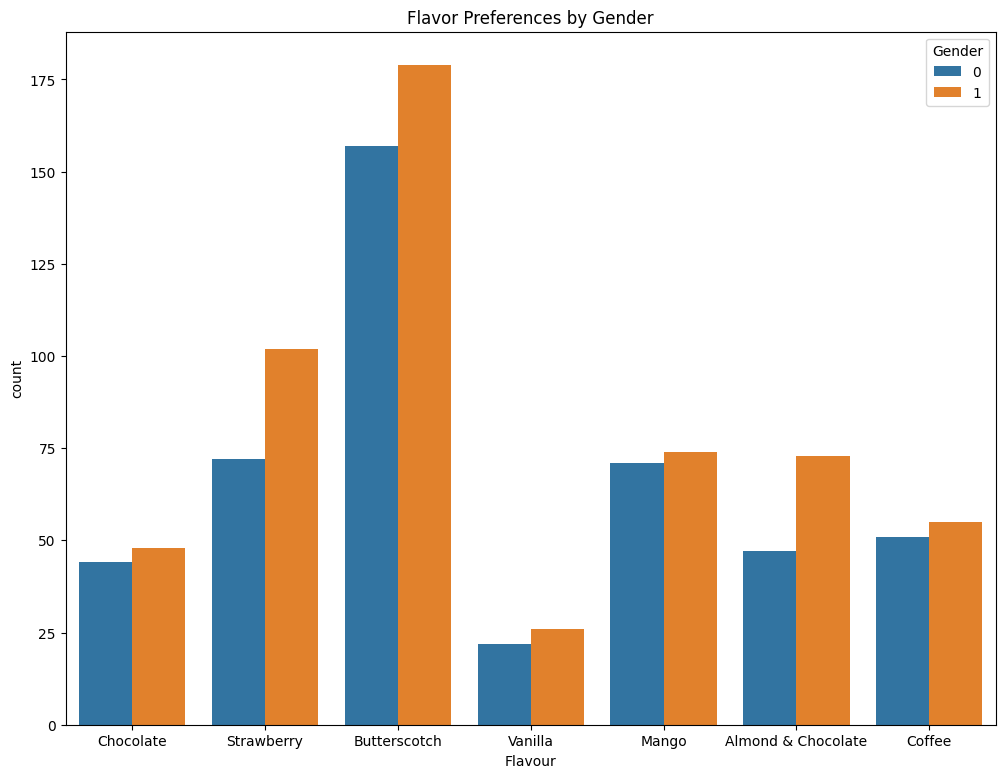

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.countplot(data=df, x='Flavour', hue='Gender')
plt.title("Flavor Preferences by Gender")
plt.show()


In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(816, 2) (816,) (205, 2) (205,)


In [41]:
from sklearn.tree import DecisionTreeClassifier
CModel = DecisionTreeClassifier()
CModel.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [43]:
y_testpred = CModel.predict(X_test)
y_testpred

array(['Almond & Chocolate', 'Strawberry', 'Almond & Chocolate', 'Mango',
       'Chocolate', 'Butterscotch', 'Almond & Chocolate', 'Mango',
       'Butterscotch', 'Strawberry', 'Almond & Chocolate', 'Butterscotch',
       'Butterscotch', 'Almond & Chocolate', 'Butterscotch',
       'Almond & Chocolate', 'Chocolate', 'Strawberry', 'Chocolate',
       'Mango', 'Mango', 'Almond & Chocolate', 'Butterscotch',
       'Butterscotch', 'Chocolate', 'Butterscotch', 'Mango', 'Coffee',
       'Almond & Chocolate', 'Mango', 'Butterscotch', 'Butterscotch',
       'Almond & Chocolate', 'Strawberry', 'Strawberry', 'Strawberry',
       'Butterscotch', 'Almond & Chocolate', 'Mango', 'Butterscotch',
       'Chocolate', 'Butterscotch', 'Butterscotch', 'Butterscotch',
       'Strawberry', 'Butterscotch', 'Almond & Chocolate', 'Butterscotch',
       'Strawberry', 'Coffee', 'Mango', 'Butterscotch', 'Strawberry',
       'Almond & Chocolate', 'Almond & Chocolate', 'Butterscotch',
       'Butterscotch', 'Straw

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_testpred)

0.44878048780487806

In [ ]:
CModel.predict([ [18, 1] ]) # Age = 18 , Male 

d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Mango'], dtype=object)

In [53]:
def flav_pred():
    age = int(input('Age:'))
    gen = input('Gender:').capitalize()
    gender = le.transform([gen]).item()
    flav = CModel.predict([[age, gender]])
    print("Age:",age)
    print("Gender:",gen)
    print('Recommended Flavour:', flav[0])

In [ ]:
flav_pred()

Age: 20
Gender: Male
Recommended Flavour: Almond & Chocolate


d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [56]:
confusion_matrix(y_test,y_testpred)

array([[10,  0,  0,  2,  0,  0,  0],
       [17, 27,  0,  3,  9,  9,  2],
       [ 0,  0, 20,  0,  0,  4,  0],
       [11,  3,  0,  4,  0,  0,  0],
       [ 0, 13,  0,  0, 14,  0,  4],
       [ 0, 14, 12,  0,  0, 17,  0],
       [ 0,  2,  0,  0,  8,  0,  0]], dtype=int64)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_testpred))


                    precision    recall  f1-score   support

Almond & Chocolate       0.26      0.83      0.40        12
      Butterscotch       0.46      0.40      0.43        67
         Chocolate       0.62      0.83      0.71        24
            Coffee       0.44      0.22      0.30        18
             Mango       0.45      0.45      0.45        31
        Strawberry       0.57      0.40      0.47        43
           Vanilla       0.00      0.00      0.00        10

          accuracy                           0.45       205
         macro avg       0.40      0.45      0.39       205
      weighted avg       0.46      0.45      0.44       205



<Axes: >

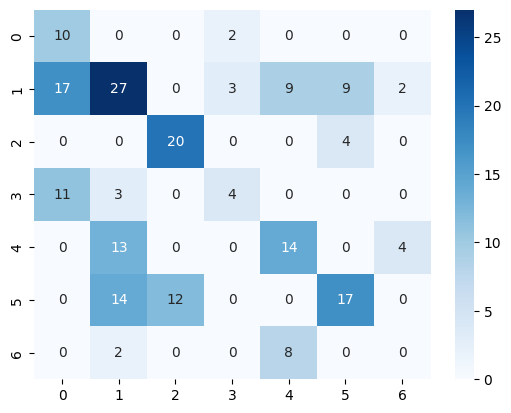

In [60]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_testpred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


In [92]:
CModel2 = DecisionTreeClassifier(max_depth=4)
CModel2.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [93]:
accuracy_score(y_test,CModel2.predict(X_test))

0.4682926829268293

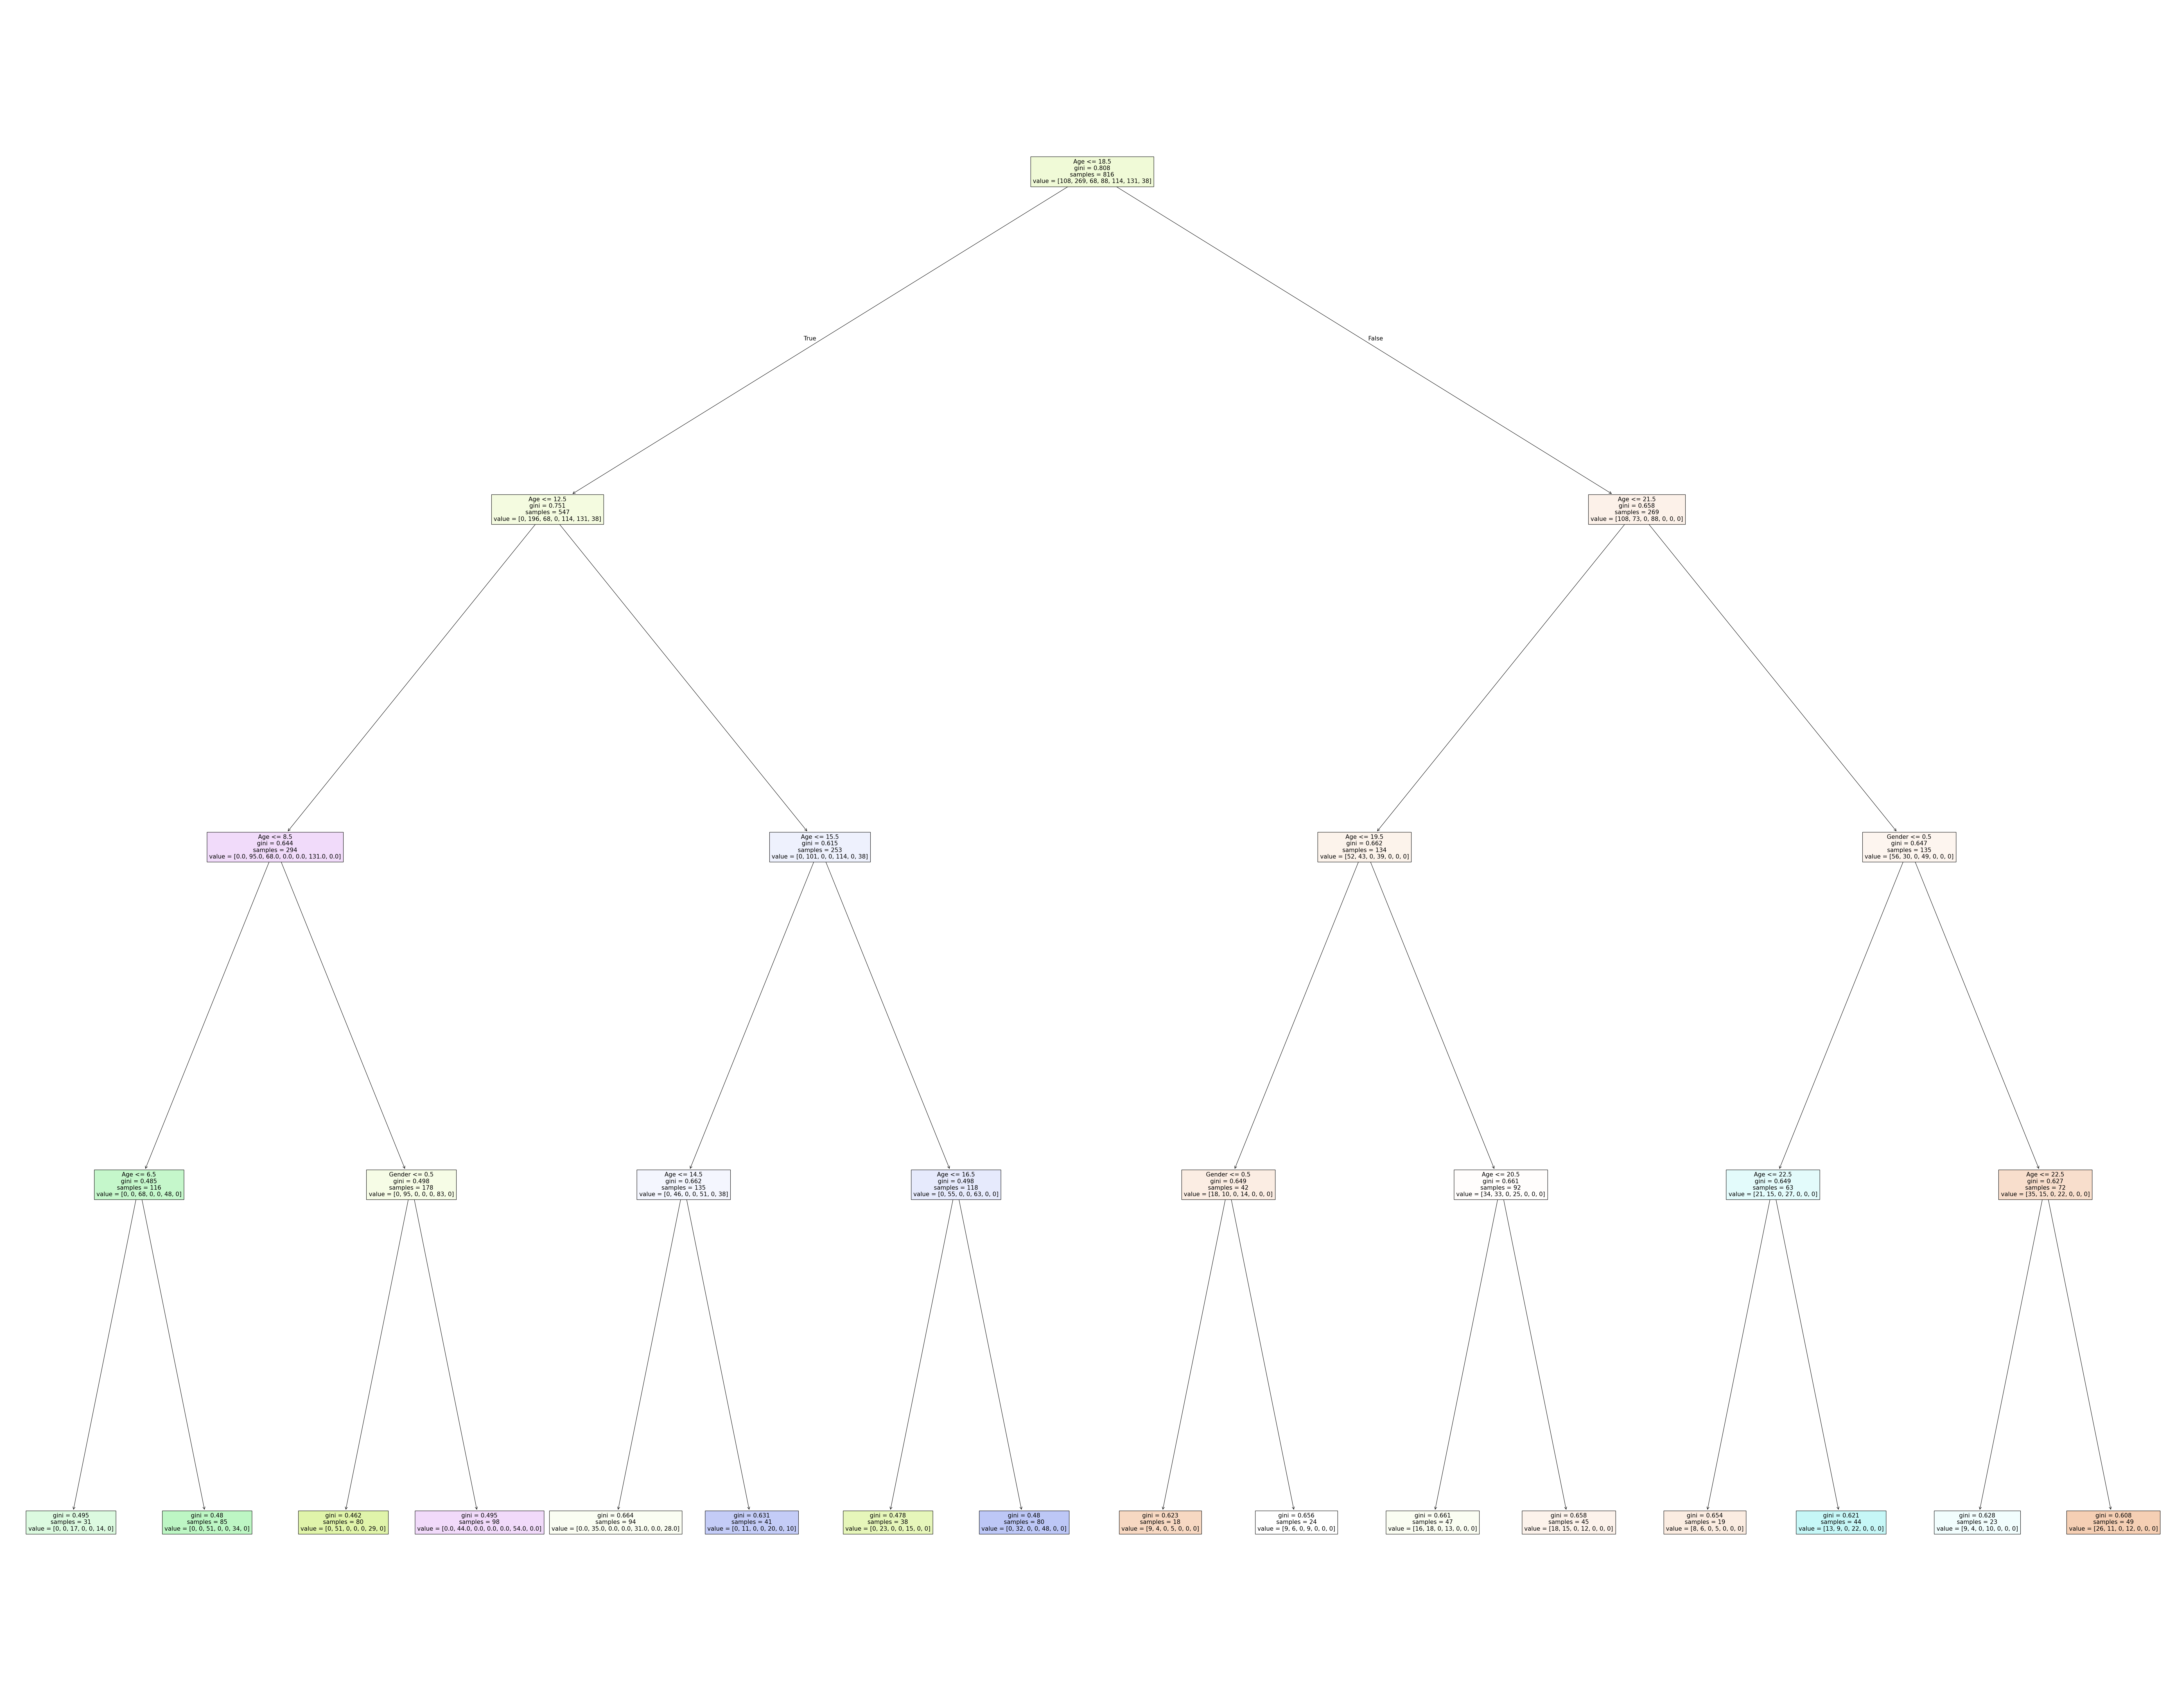

In [96]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100, 78))
plot_tree(CModel2, feature_names=X.columns, filled=True)
plt.show()

In [100]:
pd.Series(y).value_counts()

Flavour
Butterscotch          336
Strawberry            174
Mango                 145
Almond & Chocolate    120
Coffee                106
Chocolate              92
Vanilla                48
Name: count, dtype: int64

In [105]:
print(X.dtypes)
print(X.shape)
print(y.shape)


Age       int64
Gender    int32
dtype: object
(1021, 2)
(1021,)


## Random Forest Model

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Adjusts weights inversely proportional to class frequencies
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [122]:
accuracy_score(y_test,rf.predict(X_test))

0.47317073170731705

## SVM Model

In [142]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler().fit(X_train)
X_train_s = sc.transform(X_train)
X_test_s = sc.transform(X_test)

In [143]:
from sklearn.svm import SVC
svm = SVC(kernel="poly",
              class_weight='balanced',
    probability=True,
    random_state=42
)
svm.fit(X_train_s,y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [144]:
accuracy_score(y_test,svm.predict(X_test_s))

0.4634146341463415

## XGBoost

In [152]:
import xgboost as xgb

In [153]:
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=7,  # Replace with your actual number of classes
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)


In [155]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [157]:
model.fit(X_train, y_train_encoded) ## Fitting the model on train data

d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:32:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [158]:
accuracy_score(y_test_encoded,model.predict(X_test))

0.44878048780487806

In [120]:
import pandas as pd
import numpy as np
from collections import Counter

# Load dataset
df = pd.read_csv('flavour.csv')

# Check current distribution
class_counts = df['Flavour'].value_counts()
print("Original distribution:", class_counts)

# Find the majority class count
max_count = class_counts.max()

# Oversample minority classes
balanced_dfs = []
for flavour in class_counts.index:
    flavour_data = df[df['Flavour'] == flavour]
    current_count = len(flavour_data)
    
    if current_count < max_count:
        # Sample with replacement to reach max_count
        additional_samples = max_count - current_count
        oversampled = flavour_data.sample(n=additional_samples, replace=True, random_state=42)
        balanced_dfs.append(pd.concat([flavour_data, oversampled]))
    else:
        balanced_dfs.append(flavour_data)

# Combine all balanced data
df_balanced = pd.concat(balanced_dfs, ignore_index=True)

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced distribution:")
print(df_balanced['Flavour'].value_counts())

# Save balanced dataset
df_balanced.to_csv('balanced_flavour_manual.csv', index=False)


Original distribution: Flavour
Butterscotch          336
Strawberry            174
Mango                 145
Almond & Chocolate    120
Coffee                106
Chocolate              92
Vanilla                48
Name: count, dtype: int64
Balanced distribution:
Flavour
Chocolate             336
Strawberry            336
Vanilla               336
Mango                 336
Coffee                336
Butterscotch          336
Almond & Chocolate    336
Name: count, dtype: int64


In [125]:
df = pd.read_csv("../Dataset/balanced_flavour.csv")

In [126]:
df.head()

,Unnamed: 0,Age,Gender,Flavour
0,306,8,0,Chocolate
1,742,8,0,Strawberry
2,377,13,0,Vanilla
3,944,16,1,Mango
4,652,6,1,Chocolate


In [ ]:
X_new = df[['Age','Gender']]
y_new = df[['Flavour']]

In [130]:
X_new.head()

,Age,Gender
0,8,0
1,8,0
2,13,0
3,16,1
4,6,1


In [131]:
y_new.head()

,Flavour
0,Chocolate
1,Strawberry
2,Vanilla
3,Mango
4,Chocolate


In [132]:
print(X_new.shape,y_new.shape)

(2352, 2) (2352, 1)


In [159]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=42)

## Training Multiple Models at once 

In [160]:
## For svm 
sc= StandardScaler().fit(X_train)
X_train_s = sc.transform(X_train)
X_test_s = sc.transform(X_test)

In [161]:
## For XGBoost
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
models = {
    'SVM': svm,               # SVC 
    'Random Forest': rf,      # RandomForestClassifier
    'Decision Tree': CModel2, # DecisionTreeClassifier
    'XGBoost': model          # XGBClassifier
}

accuracy_dict = {}

for name, clf in models.items():
    print(f"\n Evaluating: {name}")

    if name == 'SVM':
        clf.fit(X_train_s, y_train)
        y_pred = clf.predict(X_test_s)

    elif name == 'XGBoost':
        clf.fit(X_train, y_train_encoded)
        y_pred_encoded = clf.predict(X_test)
        y_pred = le.inverse_transform(y_pred_encoded)

    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy_dict[name] = acc
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔍 Evaluating: SVM
Accuracy: 0.5902335456475584
Classification Report:
                     precision    recall  f1-score   support

Almond & Chocolate       0.49      0.57      0.53        68
      Butterscotch       0.00      0.00      0.00        65
         Chocolate       0.73      1.00      0.84        66
            Coffee       0.39      0.37      0.38        59
             Mango       0.57      0.51      0.54        72
        Strawberry       0.77      0.64      0.70        75
           Vanilla       0.56      1.00      0.72        66

          accuracy                           0.59       471
         macro avg       0.50      0.59      0.53       471
      weighted avg       0.51      0.59      0.54       471


🔍 Evaluating: Random Forest


d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\skl

Accuracy: 0.6093418259023354
Classification Report:
                     precision    recall  f1-score   support

Almond & Chocolate       0.55      0.62      0.58        68
      Butterscotch       0.26      0.08      0.12        65
         Chocolate       0.73      1.00      0.84        66
            Coffee       0.50      0.59      0.54        59
             Mango       0.70      0.51      0.59        72
        Strawberry       0.77      0.48      0.59        75
           Vanilla       0.58      1.00      0.73        66

          accuracy                           0.61       471
         macro avg       0.58      0.61      0.57       471
      weighted avg       0.59      0.61      0.57       471


🔍 Evaluating: Decision Tree
Accuracy: 0.6178343949044586
Classification Report:
                     precision    recall  f1-score   support

Almond & Chocolate       0.51      0.57      0.54        68
      Butterscotch       0.00      0.00      0.00        65
         Chocolate   

d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

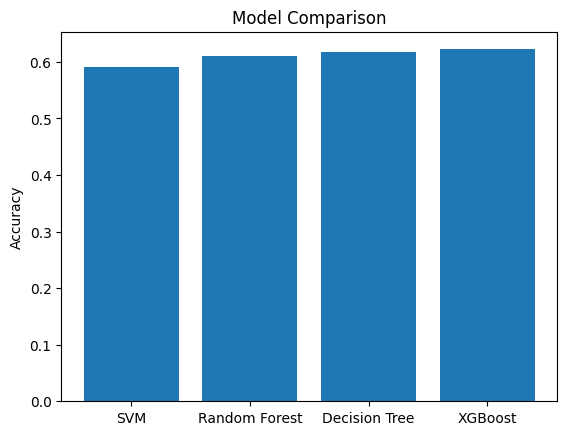

In [165]:
import matplotlib.pyplot as plt

# Just plot the raw accuracy dictionary
plt.bar(accuracy_dict.keys(), accuracy_dict.values())
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()